In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## An introduction to Statistical Learning with Applications in R (ISLR)

 - http://www-bcf.usc.edu/~gareth/ISL/index.html

In [2]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Advertising.csv'

In [3]:
df= pd.read_csv(url, usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


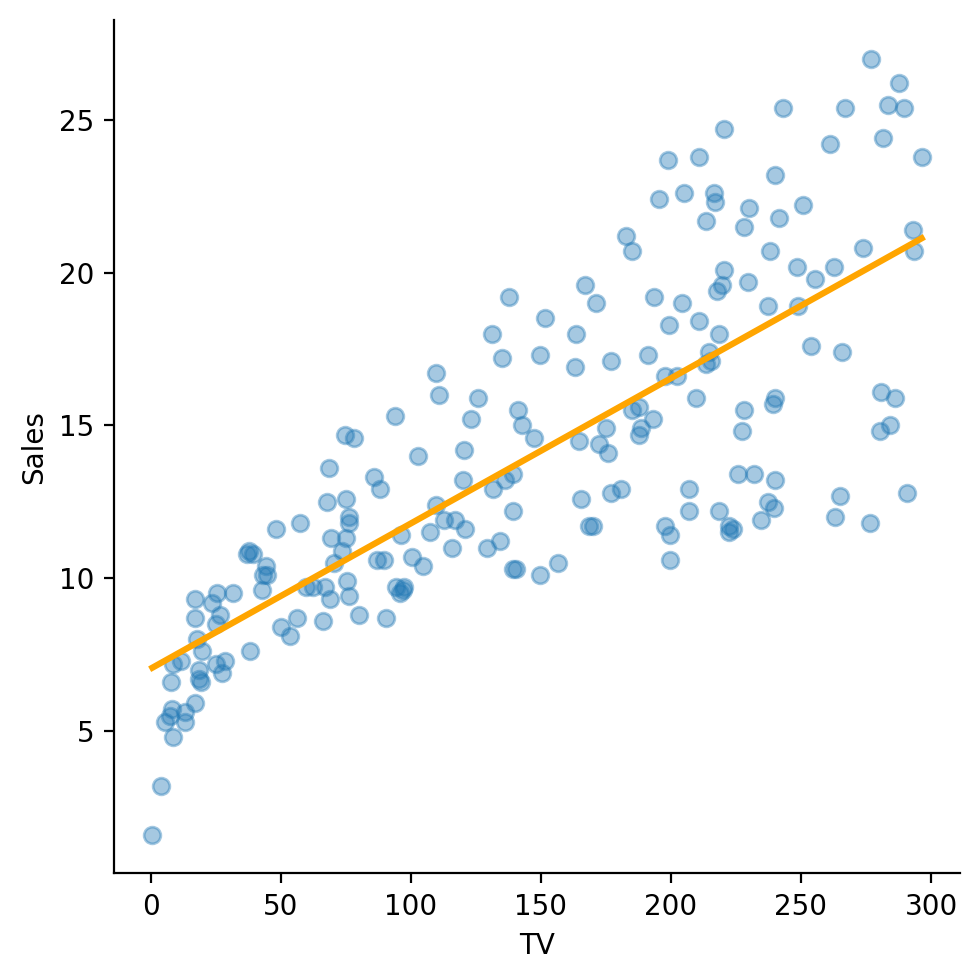

In [6]:
sns.lmplot(x='TV', y='Sales', data=df, ci=None,
          scatter_kws={'alpha': .4},
          line_kws={'color': 'orange'})

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

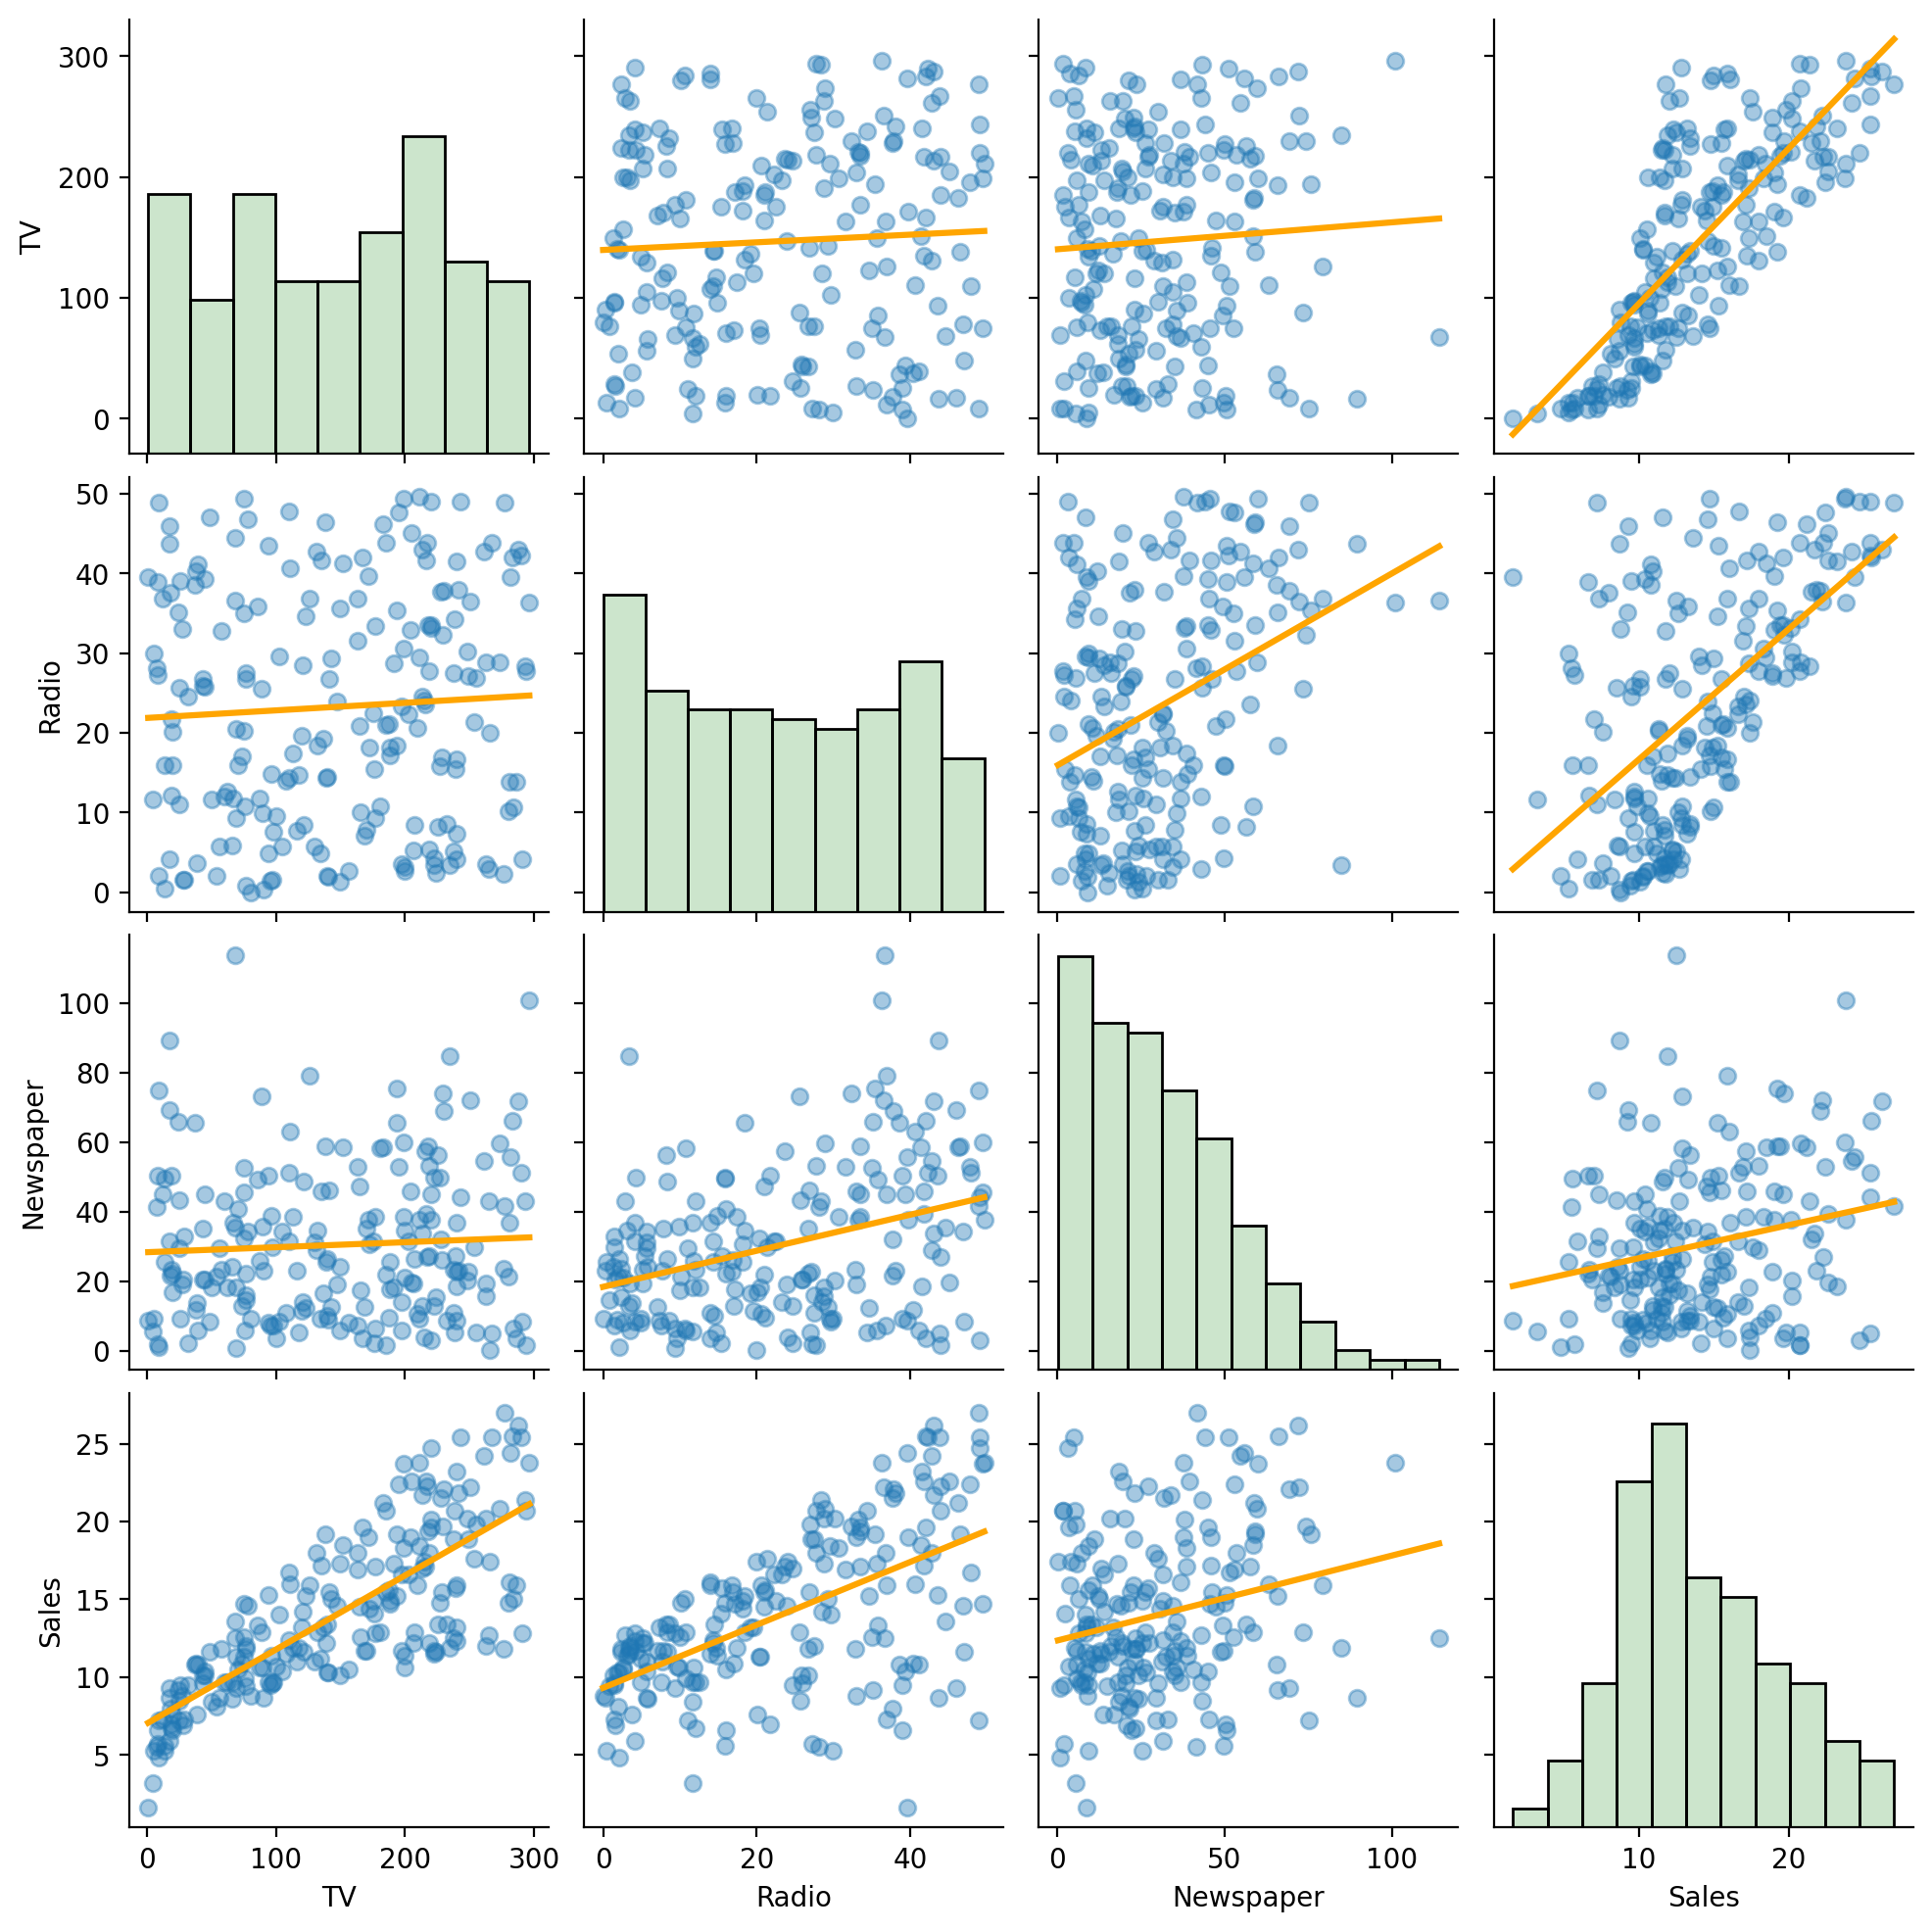

In [18]:
sns.pairplot(df,kind='reg',
            plot_kws={'scatter_kws': {'alpha': .4},
          'line_kws': {'color': 'orange'}, 'ci':None},
             diag_kws={'color': 'green', 'alpha':.2});

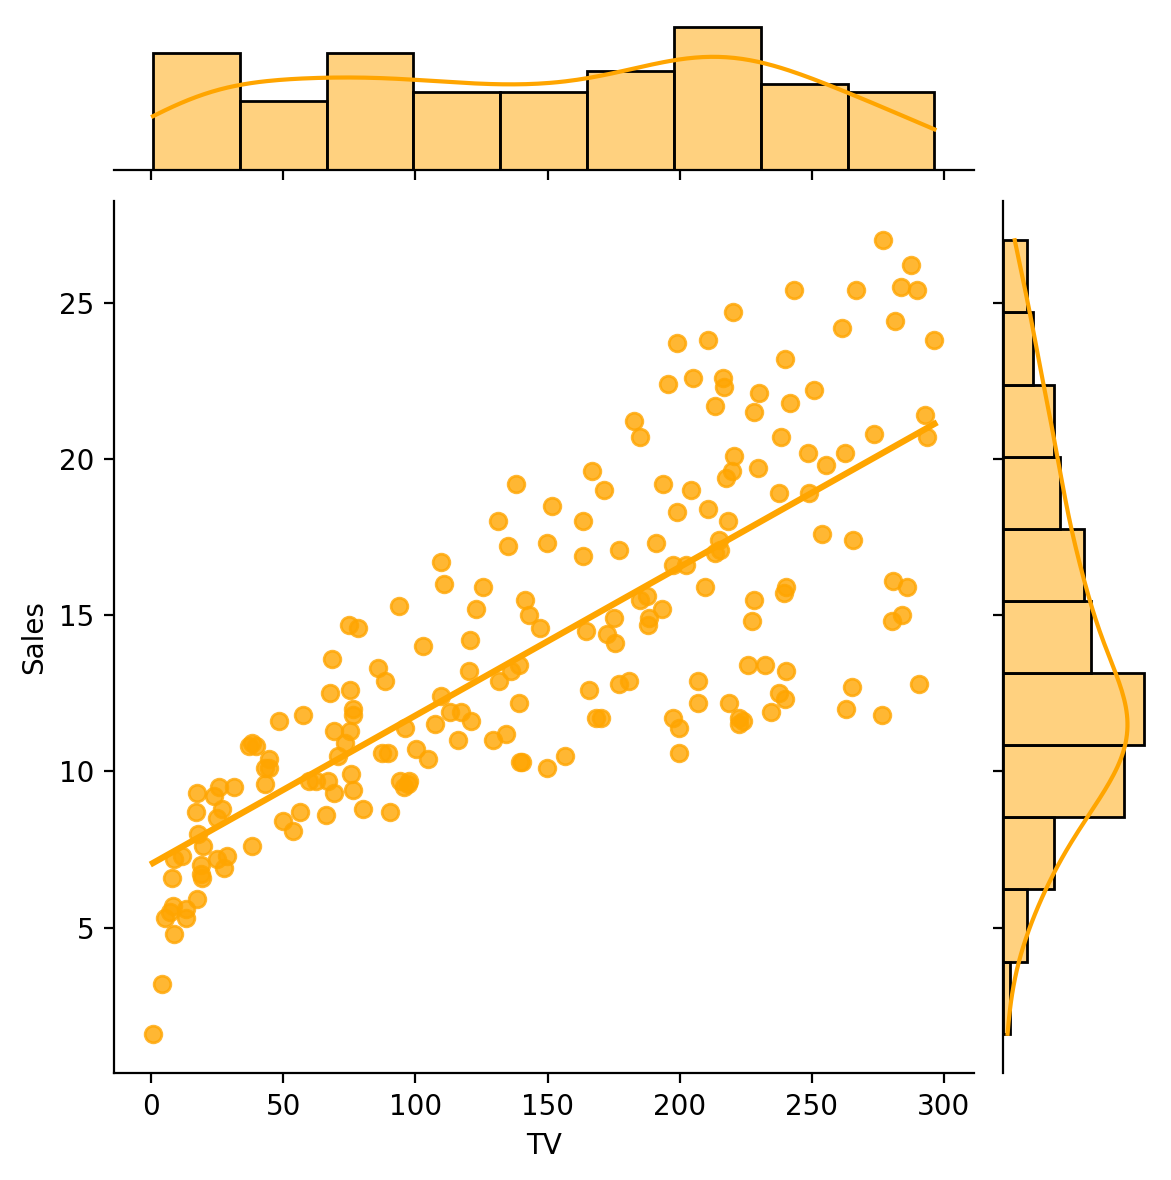

In [19]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg', ci=None,
             color='orange');

## sklearn: LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model

LinearRegression()

In [22]:
X = df.drop(columns=['Sales'])[:140]
y = df['Sales'][:140]

In [23]:
len(X)

140

In [24]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
135    11.6
136     9.5
137    20.8
138     9.6
139    20.7
Name: Sales, Length: 140, dtype: float64

In [26]:
model.fit(X,y)

LinearRegression()

In [27]:
model.score(X,y) # R-squared

0.8937102367013778

In [28]:
model.intercept_

3.0451422090371167

In [29]:
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

In [30]:
model.predict([[200,40,70]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

In [31]:
model.predict([[200,40,70], 
               [100,80,50],  
               [ 40,20,10]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])

In [32]:
X_test=df.drop(columns=['Sales'])[:140:]
X_test

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
135,48.3,47.0,8.5
136,25.6,39.0,9.3
137,273.7,28.9,59.7
138,43.0,25.9,20.5


In [33]:
y_hat=model.predict(X_test)
y_hat

array([20.45507554, 12.06479898, 11.89354304, 17.41809923, 13.31659498,
       12.0155465 , 11.57341261, 12.18731567,  3.82408958, 12.84892643,
        7.12448667, 17.44686345, 10.27370698,  8.97633924, 18.4210923 ,
       20.65033862, 12.46880573, 23.23237682,  9.92941035, 14.21243003,
       18.13729571, 15.0602515 ,  6.37406829, 16.74425275,  8.18527884,
       15.98452234, 14.99524015, 17.27340895, 19.55143555,  9.11907984,
       21.78088899, 11.36740747,  7.79763151, 19.13402994,  7.77701597,
       17.43334667, 23.45752221, 15.29866399,  9.76498082, 20.45011203,
       16.48445487, 17.25785517, 21.83044367, 14.20950446,  8.71377594,
       15.23155817,  8.93697179, 21.73336182, 16.42361602,  8.18438513,
       12.89849335,  9.48296642, 20.600237  , 19.76115874, 20.53191226,
       21.09913057,  8.31325917, 12.85319354, 21.76197057, 18.23099567,
        5.85729352, 22.84702172, 17.00692593, 13.17041145, 16.81679536,
        7.95984797,  8.94076494, 12.17377002, 19.12272001, 21.05

In [34]:
dc=pd.concat([df[140:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,140.0,73.4,17.0,12.9,10.9,20.455076
1,141.0,193.7,35.4,75.6,19.2,12.064799
2,142.0,220.5,33.2,37.9,20.1,11.893543
3,143.0,104.6,5.7,34.4,10.4,17.418099
4,144.0,96.2,14.8,38.9,11.4,13.316595
...,...,...,...,...,...,...
135,NaN,NaN,NaN,NaN,NaN,13.737147
136,NaN,NaN,NaN,NaN,NaN,11.229273
137,NaN,NaN,NaN,NaN,NaN,20.935772
138,NaN,NaN,NaN,NaN,NaN,9.660411


## Statsmodels: Multiple Linear regression

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df[:140]).fit()

In [39]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.60e-66
Time:                        11:05:42   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [40]:
model_a.params # coef

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [41]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

In [42]:
model.intercept_ # sklearn

3.0451422090371167

In [43]:
model.coef_ #sklearn

array([ 0.04704868,  0.17968299, -0.00300557])

In [44]:
ya_hat = model_a.predict(X_test)

In [45]:
ya_hat

0      20.455076
1      12.064799
2      11.893543
3      17.418099
4      13.316595
         ...    
135    13.737147
136    11.229273
137    20.935772
138     9.660411
139    19.627417
Length: 140, dtype: float64